# Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset

In [2]:
df= pd.read_csv("Financial Analytics data.csv")a

In [3]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


#  Explore Data

In [4]:
# Display the first few rows of the dataset
print(df.head())







   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN


In [5]:
# Display the first few rows of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB
None


# Data Cleaning



In [6]:
# Fill missing values with zero or handle them as needed
df['Sales Qtr - Crore'].fillna(0, inplace=True)

# Convert 'Sales Qtr - Crore' to numeric if necessary
df['Sales Qtr - Crore'] = pd.to_numeric(df['Sales Qtr - Crore'], errors='coerce')

# Check for any remaining missing values
print(df.isnull().sum())


S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore      0
Unnamed: 4           394
dtype: int64


C:\Users\91850\AppData\Local\Temp\ipykernel_43384\238338075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales Qtr - Crore'].fillna(0, inplace=True)


# Calculate Key Metrics

# Sales Efficiency

In [7]:
# Calculate Sales Efficiency
df['Sales Efficiency'] = df['Sales Qtr - Crore'] / df['Mar Cap - Crore']


In [8]:
df['Sales Efficiency'] 

0      0.171073
1      0.054823
2      0.042615
3      0.030444
4      0.058172
         ...   
483    0.260819
484    0.082369
485    0.169139
486    0.941559
487         NaN
Name: Sales Efficiency, Length: 488, dtype: float64

# Correlation Analysis

In [9]:
# Calculate correlation between Market Cap and Sales
correlation = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                   Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore           1.000000           0.619821
Sales Qtr - Crore         0.619821           1.000000


#  Visualization

# Scatter Plot of Market Cap vs. Sales

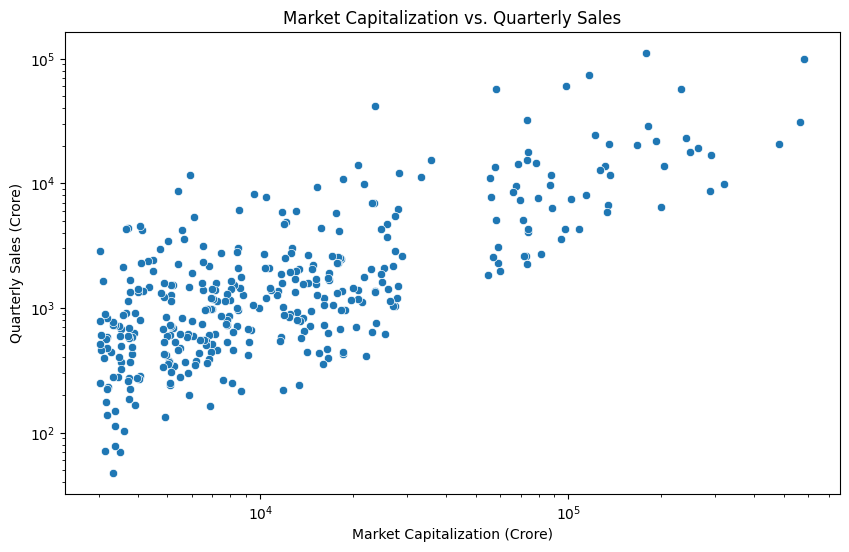

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df)
plt.title('Market Capitalization vs. Quarterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.xscale('log')  # Optional: Use log scale for better visualization
plt.yscale('log')  # Optional: Use log scale for better visualization
plt.show()


# Sales Efficiency Distribution

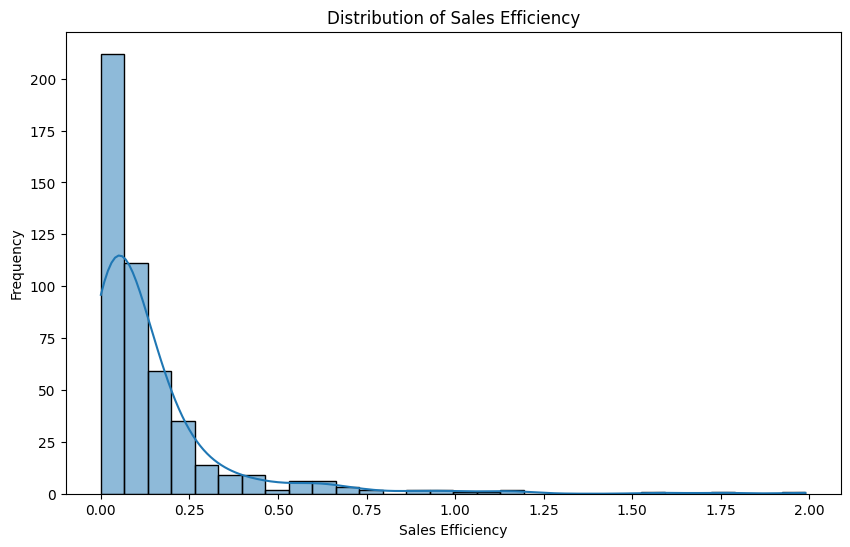

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Efficiency'], bins=30, kde=True)
plt.title('Distribution of Sales Efficiency')
plt.xlabel('Sales Efficiency')
plt.ylabel('Frequency')
plt.show()


# Top and Bottom Companies

# Top 5 by Market Cap

In [11]:
top_market_cap = df.nlargest(5, 'Mar Cap - Crore')
print("Top 5 Companies by Market Capitalization:")
print(top_market_cap[['Name', 'Mar Cap - Crore']])


Top 5 Companies by Market Capitalization:
             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37


# Top 5 by Sales

In [12]:
top_sales = df.nlargest(5, 'Sales Qtr - Crore')
print("Top 5 Companies by Quarterly Sales:")
print(top_sales[['Name', 'Sales Qtr - Crore']])


Top 5 Companies by Quarterly Sales:
              Name  Sales Qtr - Crore
14         I O C L          110666.93
0   Reliance Inds.           99810.00
23     Tata Motors           74156.07
27         B P C L           60616.36
54         H P C L           57474.25


# Top 5 by Sales Efficiency

In [13]:
top_sales_efficiency = df.nlargest(5, 'Sales Efficiency')
print("Top 5 Companies by Sales Efficiency:")
print(top_sales_efficiency[['Name', 'Sales Efficiency']])


Top 5 Companies by Sales Efficiency:
                 Name  Sales Efficiency
320   Redington India          1.989031
122    Rajesh Exports          1.757986
334           C P C L          1.582066
441  Corporation Bank          1.180653
444     Oriental Bank          1.159876


# Check for Missing or Infinite Values

In [16]:
# Check for missing values in X and y
print(X.isnull().sum())
print(y.isnull().sum())

# Check for infinite values
print((X == float('inf')).sum())
print((y == float('inf')).sum())


const              0
Mar Cap - Crore    9
dtype: int64
0
const              0
Mar Cap - Crore    0
dtype: int64
0


#  Handle Missing or Infinite Values

In [17]:
# Remove rows with missing values in X or y
df_clean = df.dropna(subset=['Mar Cap - Crore', 'Sales Qtr - Crore'])

# Re-define X and y
X = df_clean['Mar Cap - Crore']
y = df_clean['Sales Qtr - Crore']
X = sm.add_constant(X)  # Add a constant term to the predictor

# Check again for missing values
print(X.isnull().sum())
print(y.isnull().sum())


const              0
Mar Cap - Crore    0
dtype: int64
0


# Remove Infinite Values


In [18]:
# Replace infinite values with NaN and then drop them
df_clean.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df_clean.dropna(subset=['Mar Cap - Crore', 'Sales Qtr - Crore'], inplace=True)

# Re-define X and y
X = df_clean['Mar Cap - Crore']
y = df_clean['Sales Qtr - Crore']
X = sm.add_constant(X)  # Add a constant term to the predictor

# Check again for missing values
print(X.isnull().sum())
print(y.isnull().sum())


const              0
Mar Cap - Crore    0
dtype: int64
0


C:\Users\91850\AppData\Local\Temp\ipykernel_43384\1404751118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
C:\Users\91850\AppData\Local\Temp\ipykernel_43384\1404751118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(subset=['Mar Cap - Crore', 'Sales Qtr - Crore'], inplace=True)


# Regression Analysis

In [19]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:      Sales Qtr - Crore   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     297.6
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           3.58e-52
Time:                        19:17:23   Log-Likelihood:                -4968.0
No. Observations:                 479   AIC:                             9940.
Df Residuals:                     477   BIC:                             9948.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             467.7729    391.337     